<a href="https://colab.research.google.com/github/SridharChapparbande/Data-Science/blob/main/H1N1_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY ON ALL MODELS:



In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/Datasets/PROJECT'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Datasets/PROJECT


In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Read and Explore Data

In [ ]:
#reading the original data using csv file
data = pd.read_csv("h1n1_vaccine_prediction.csv")
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
#making the shallow copy of the data for EDA and data analysis 
#shalllow copy is made bcz  if any changes done that should not change in original data
df = data.copy()
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
#checking the data of first five rows using head option
#By default head shows only five rows but u can get any numbers of rows using df.head(number)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
#checking the data of last five rows using tail option
#By default tail shows only five rows but u can get any numbers of rows using df.tail(number)
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
# checking the columns names 
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
#checking the shape of data
df.shape

(26707, 34)

In [ ]:
#include all includes all datatype columns in dataset like object or float or int columns
#describe is used for getting every info of columns like
 #If the column datatype is object it shows all the unique values,topmost value,frequency of column
 #If the column datatype is number(float,int) it shows mean,median,standard deviation,quantile of every column
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [ ]:
#selecting only numeric columns 
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['unique_id',
 'h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [ ]:
#selecting only object columns
object_cols=df.select_dtypes(include=['object']).columns.tolist()
object_cols

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [ ]:
#find the correlation of columns with dependent variable
correlation=df.corr()
correlation['h1n1_vaccine']

unique_id                   -0.003280
h1n1_worry                   0.121929
h1n1_awareness               0.117951
antiviral_medication         0.040608
contact_avoidance            0.047690
bought_face_mask             0.070498
wash_hands_frequently        0.074712
avoid_large_gatherings       0.017822
reduced_outside_home_cont    0.021768
avoid_touch_face             0.071648
dr_recc_h1n1_vacc            0.393890
dr_recc_seasonal_vacc        0.209864
chronic_medic_condition      0.095207
cont_child_undr_6_mnths      0.066962
is_health_worker             0.169768
has_health_insur             0.121170
is_h1n1_vacc_effective       0.269347
is_h1n1_risky                0.323265
sick_from_h1n1_vacc          0.075091
is_seas_vacc_effective       0.179272
is_seas_risky                0.258571
sick_from_seas_vacc          0.008360
no_of_adults                 0.007545
no_of_children              -0.003320
h1n1_vaccine                 1.000000
Name: h1n1_vaccine, dtype: float64

In [ ]:
#Dropping ref_no column bcz its not contributing in results
df.drop('unique_id', axis=1, inplace=True)
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


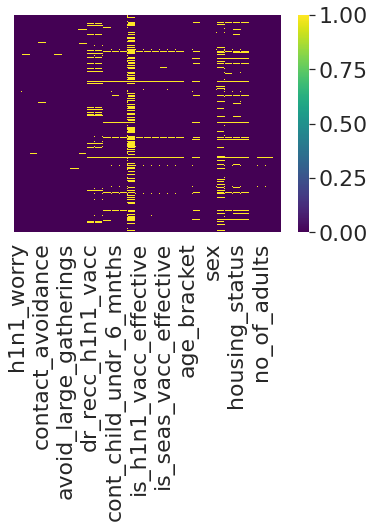

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
median=lambda x:x.fillna(x.median())
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numeric_cols]=df[numeric_cols].apply(median,axis=0)

UNIQUES OF EVERY COLUMNS:

In [ ]:
df["h1n1_worry"].unique()

array([1., 3., 2., 0.])

In [ ]:
df["h1n1_awareness"].unique()

array([0., 2., 1.])

In [ ]:
df['antiviral_medication'].unique()

array([0., 1.])

In [ ]:
df['bought_face_mask'].unique()

array([0., 1.])

In [ ]:
#let us write a function that will help us create boxplot and histogram for any input numerical variable
#this function takes numerical column as input and return boxplots and histogram for the variable

def histogram_boxplot(feature,figsize=(15,10),bins=None):
  """ Boxplot and histogram combined 
  feature :1-d feature array
  figsize:size of fig (default(9,8))
  bins: number of bins (default None/auto)
  """
  sns.set(font_scale=2) #setting the font scale of the seaborn
  f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2, #number of rows of the subplot grid=2
                                     sharex=True, #x axis will be shared among all subplots
                                     gridspec_kw={"height_ratios":(0.25,0.75)},
                                     figsize=figsize
                                     ) #creating the 2 subplots
  sns.boxplot(feature,ax=ax_box2,showmeans=True,color="red") #box plot will be created and a star
  sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)

  ax_hist2.axvline(np.mean(feature),color="g",linestyle="--") #add mean to the histogram
  ax_hist2.axvline(np.median(feature),color="black",linestyle="-") #add median to the histogram

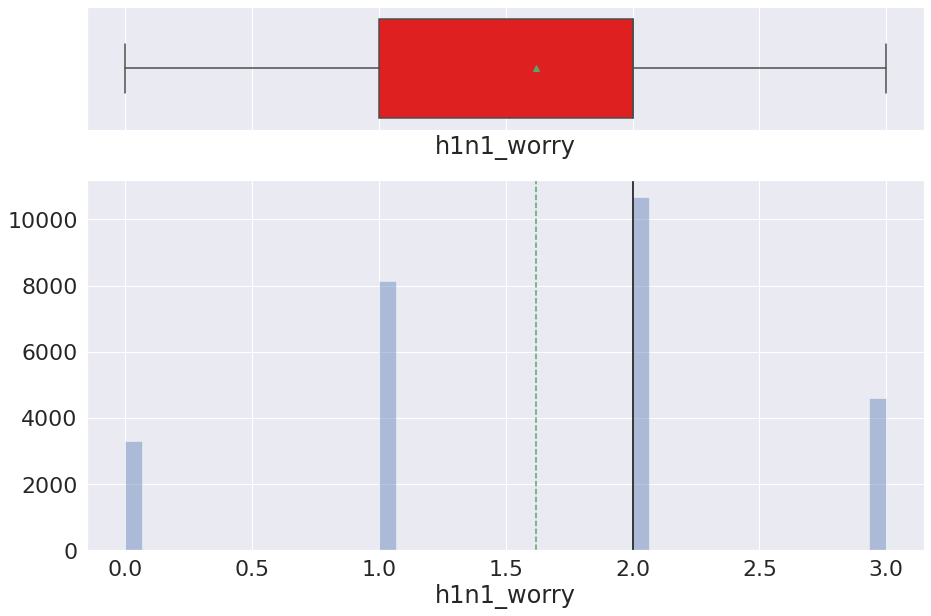

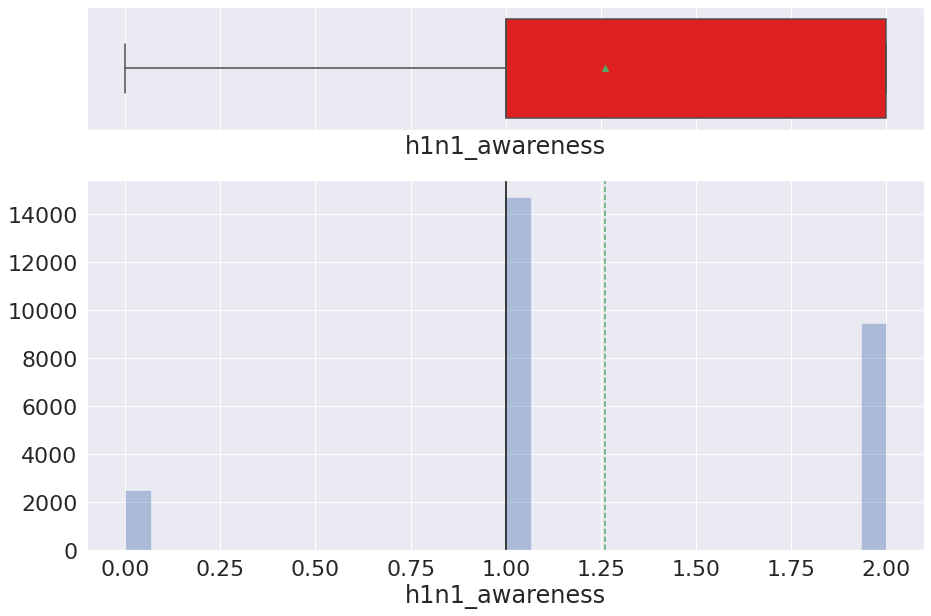

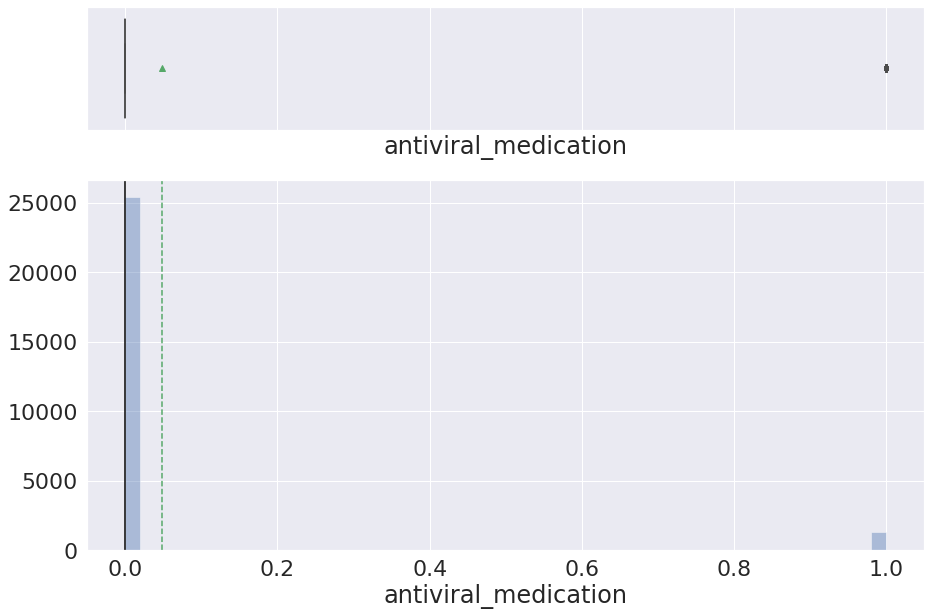

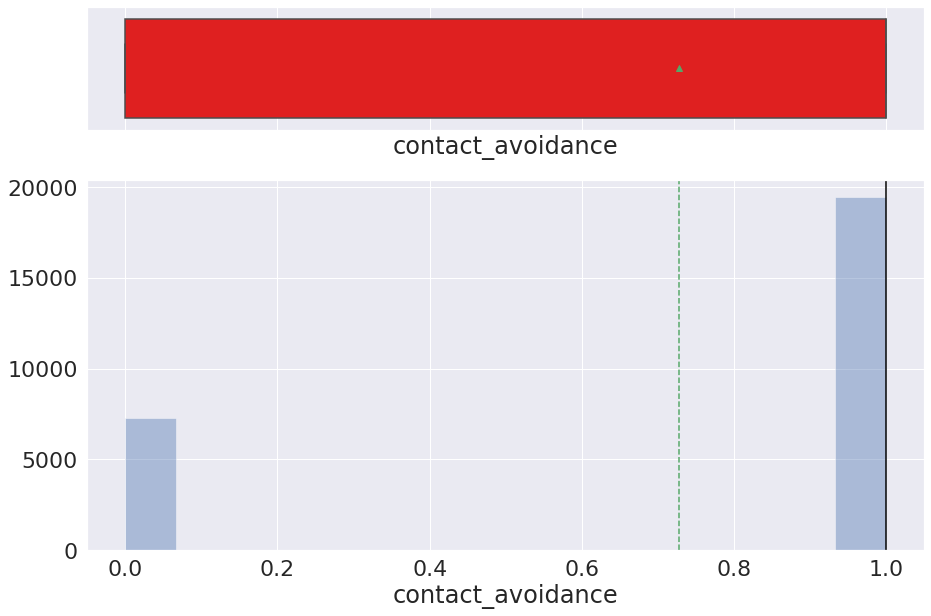

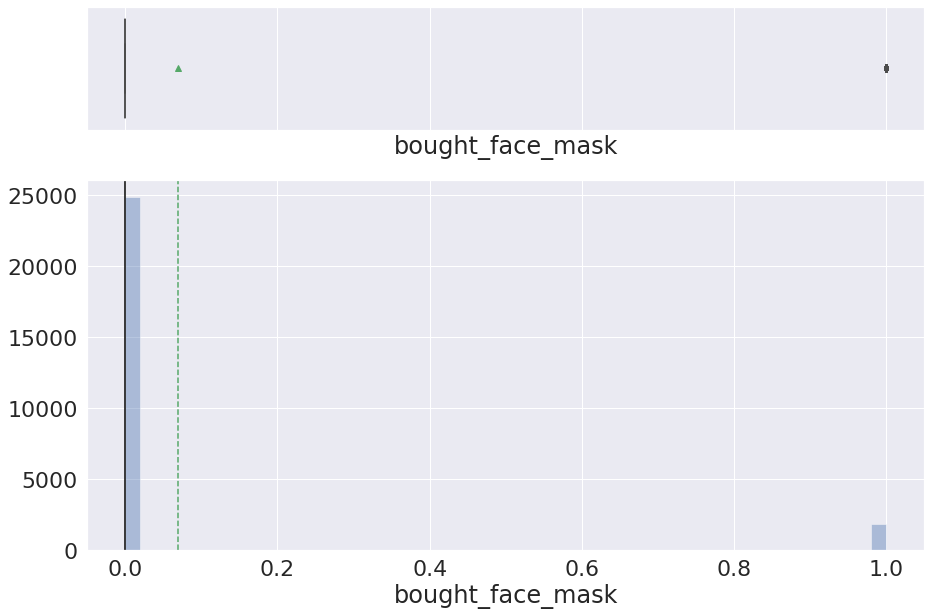

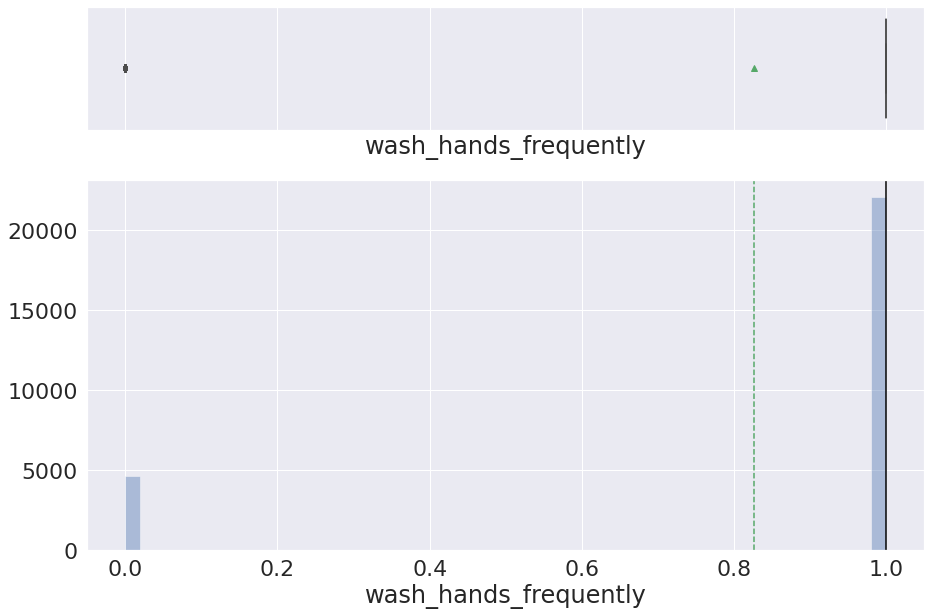

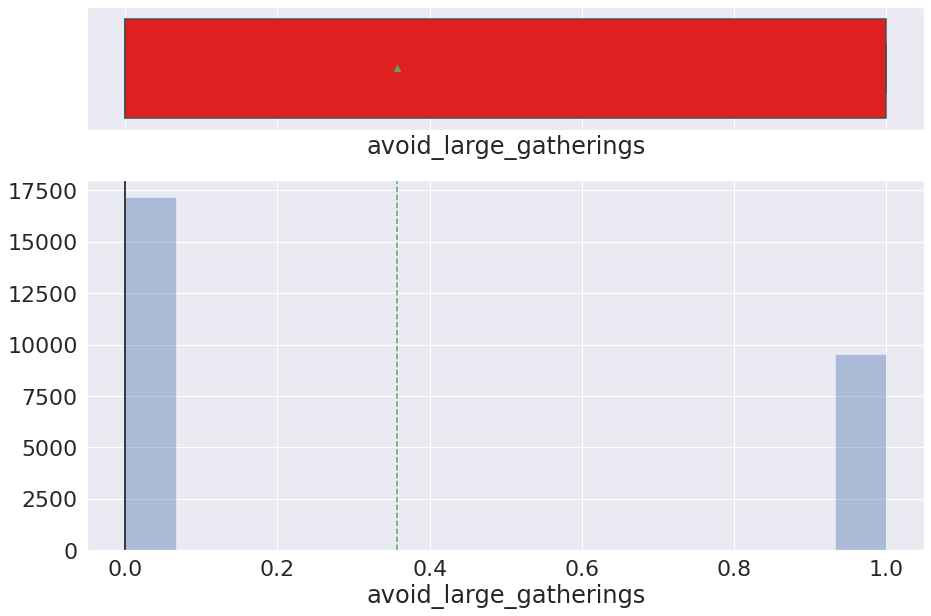

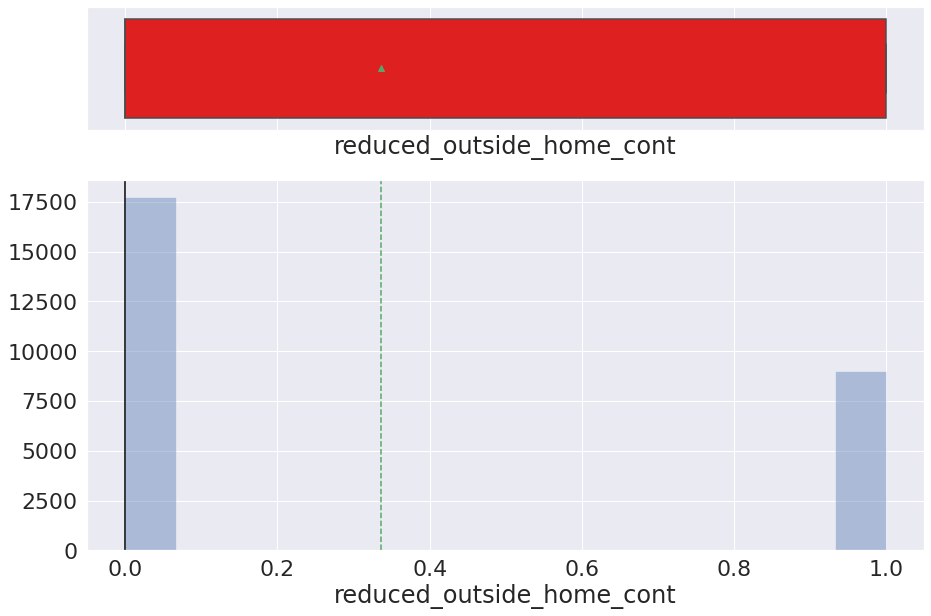

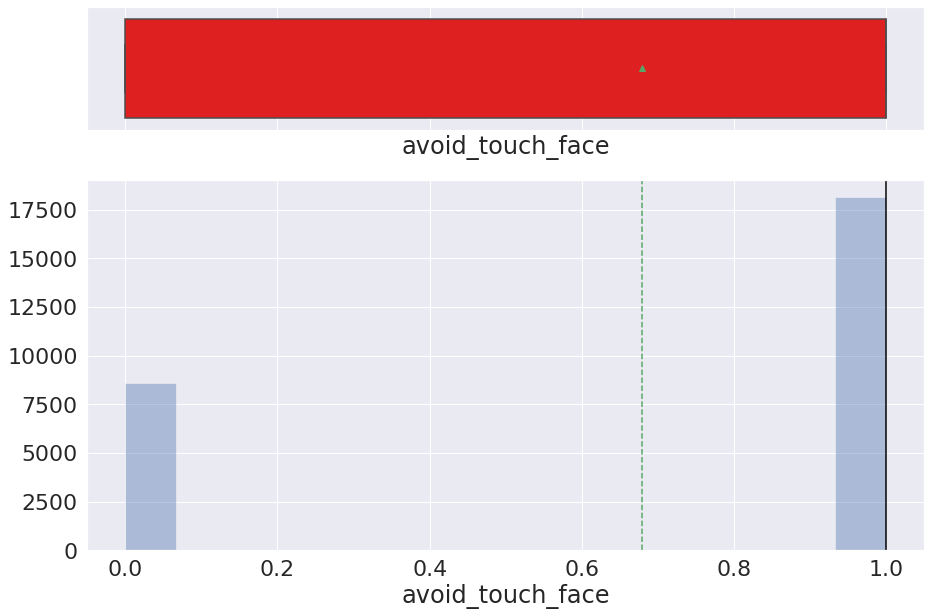

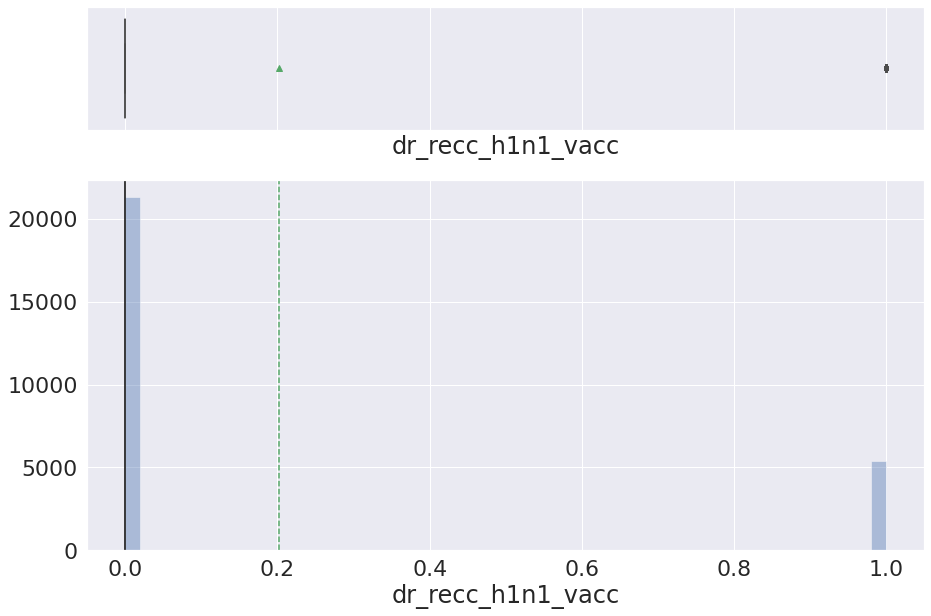

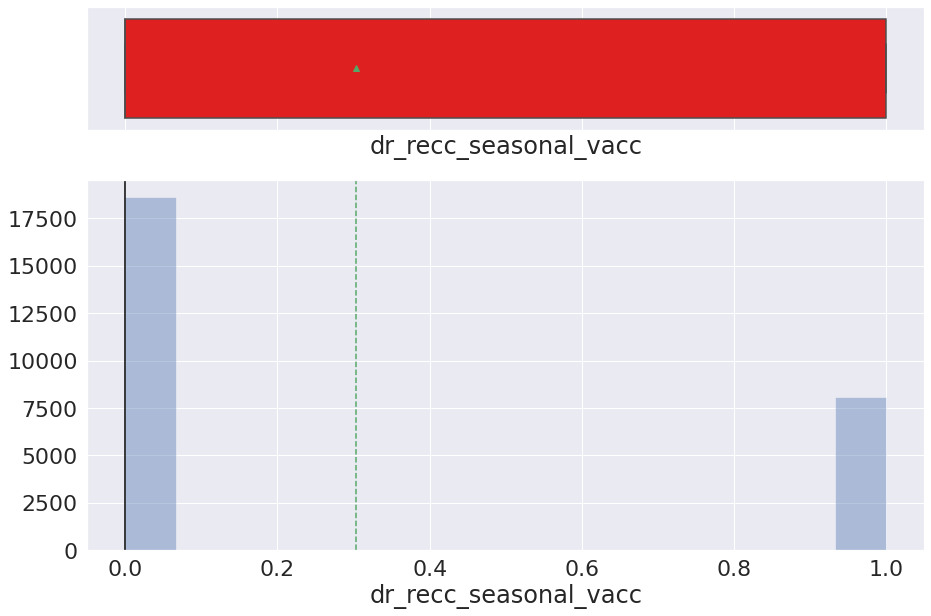

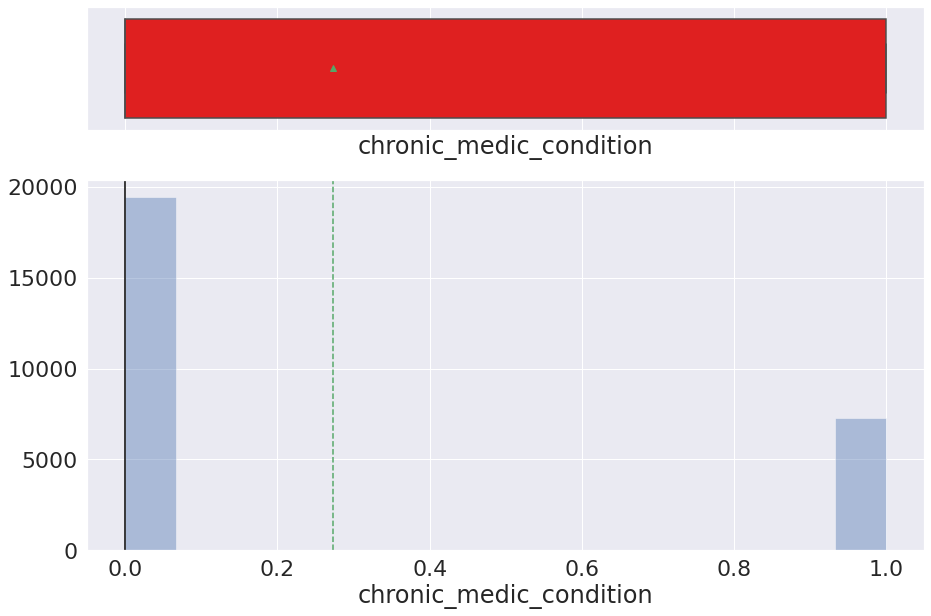

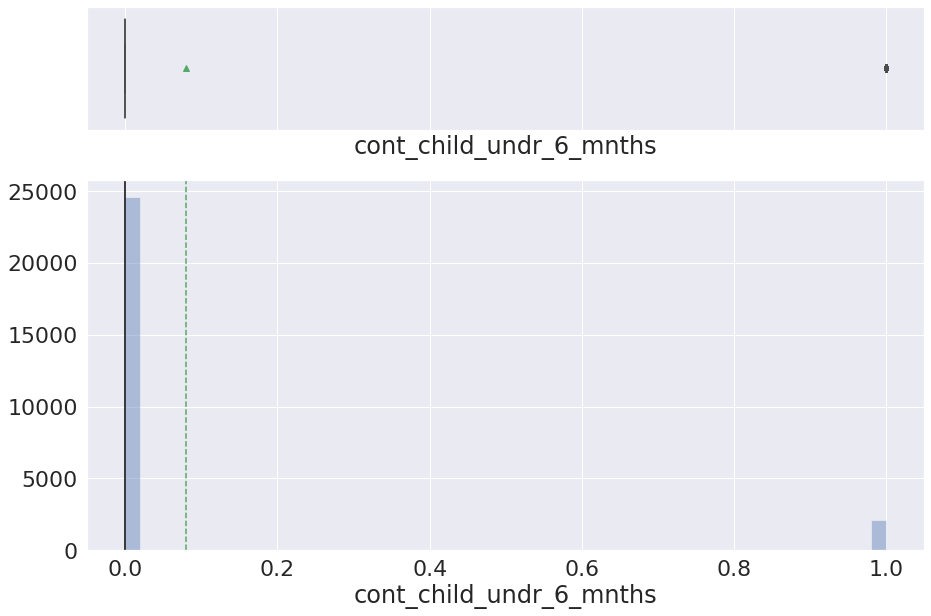

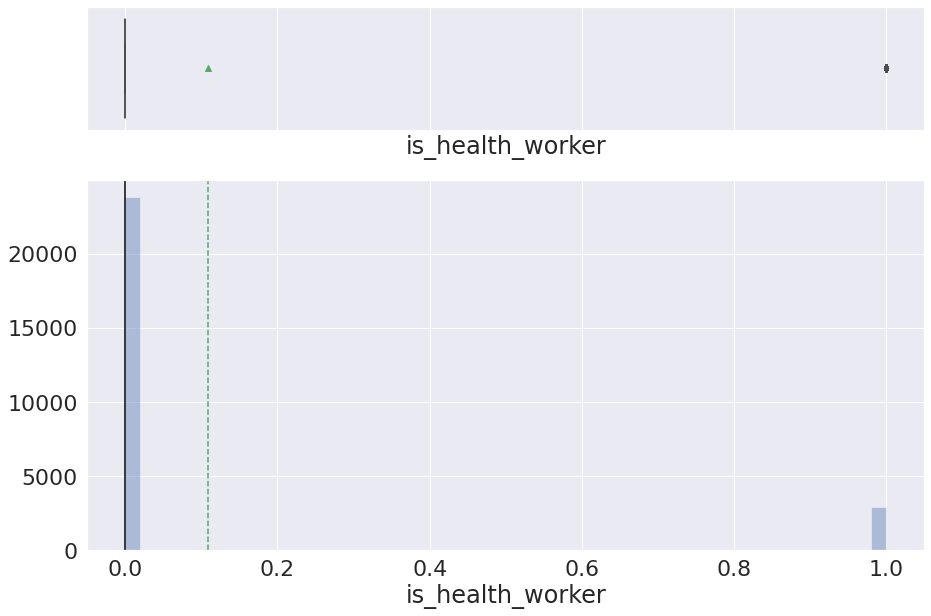

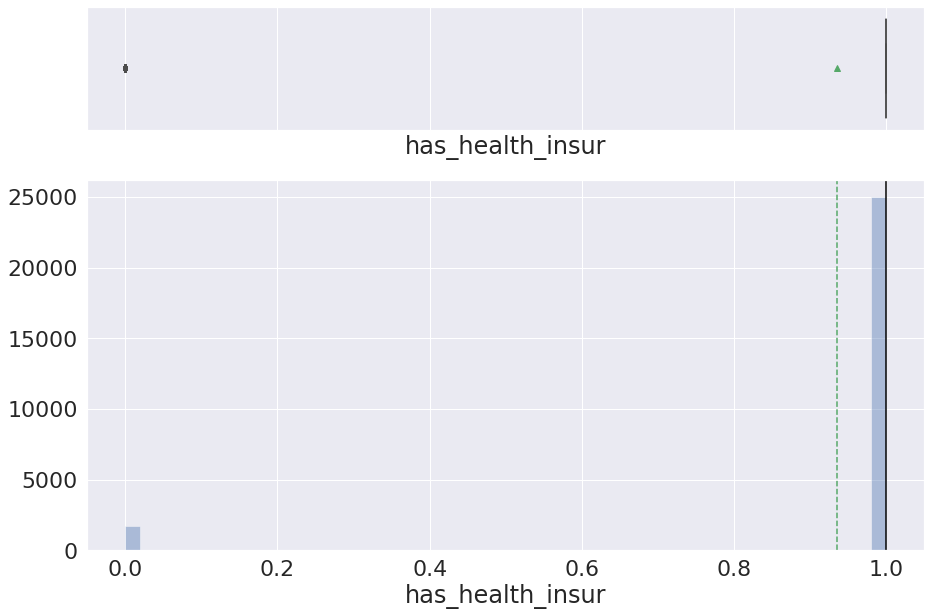

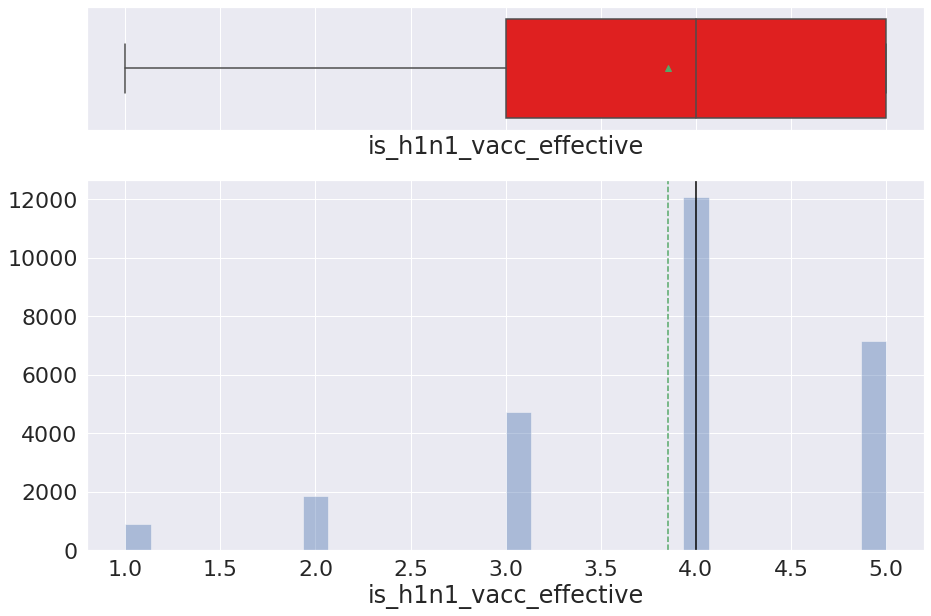

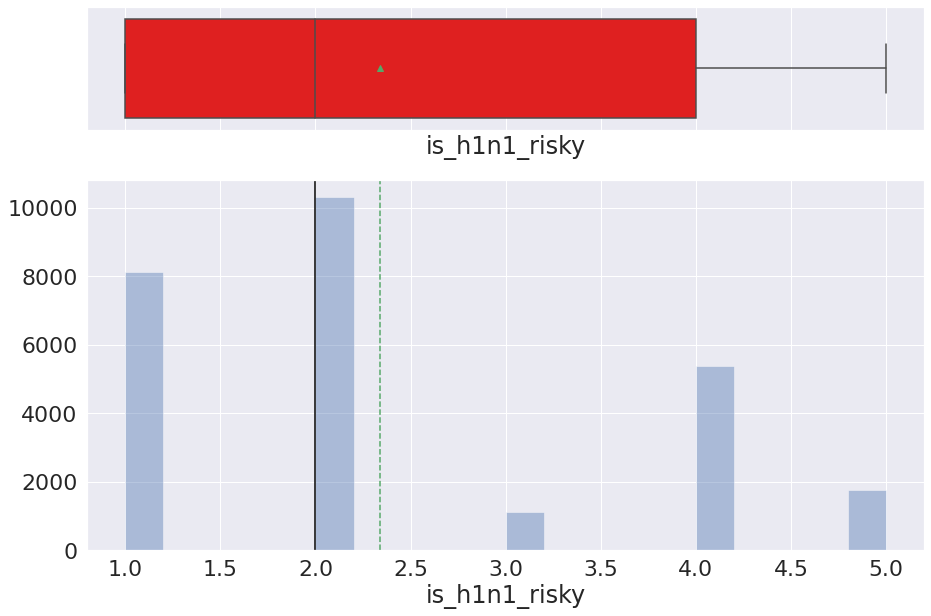

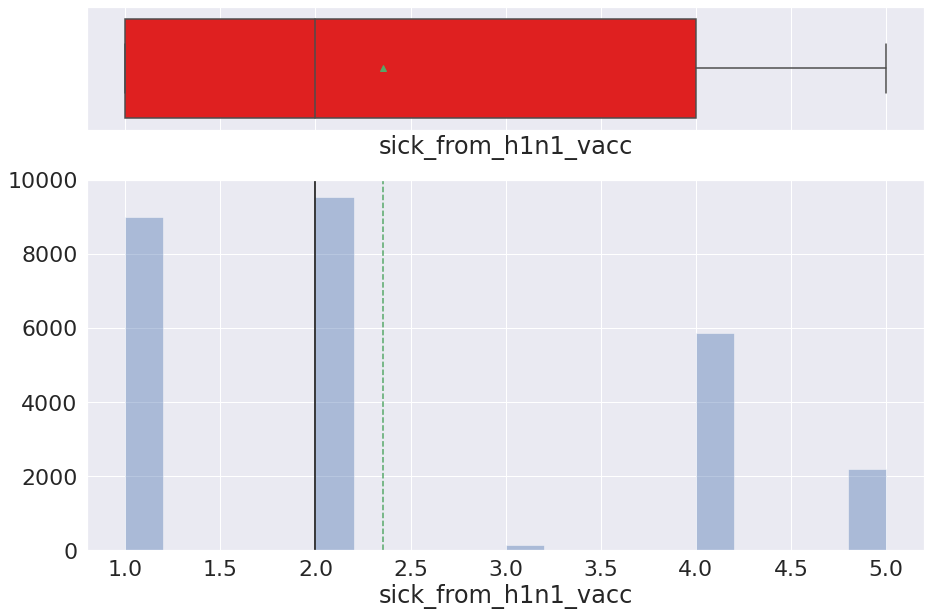

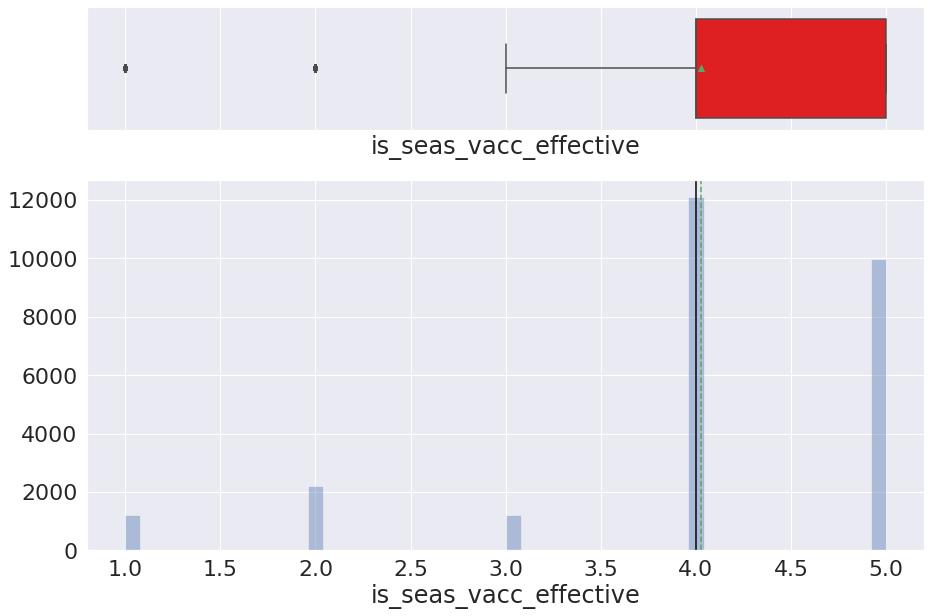

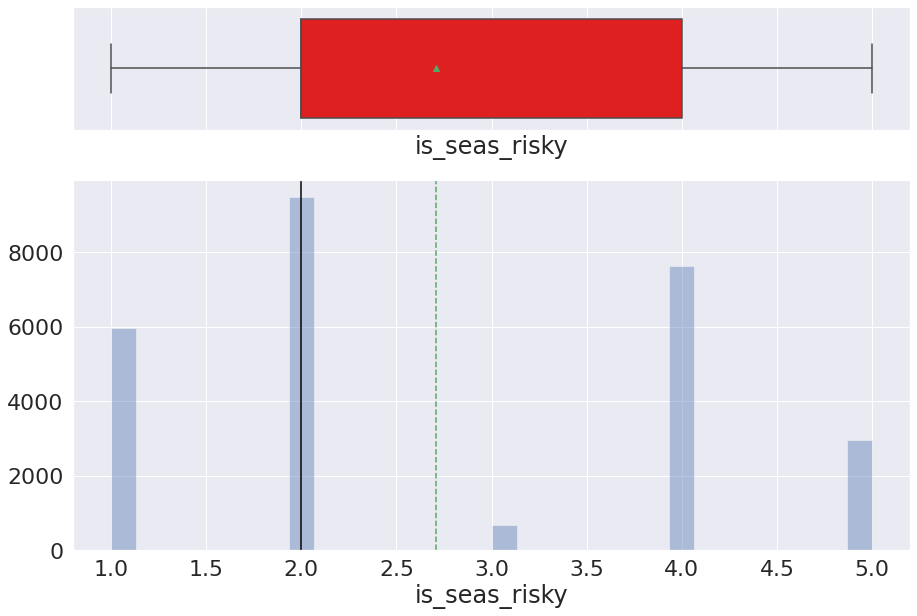

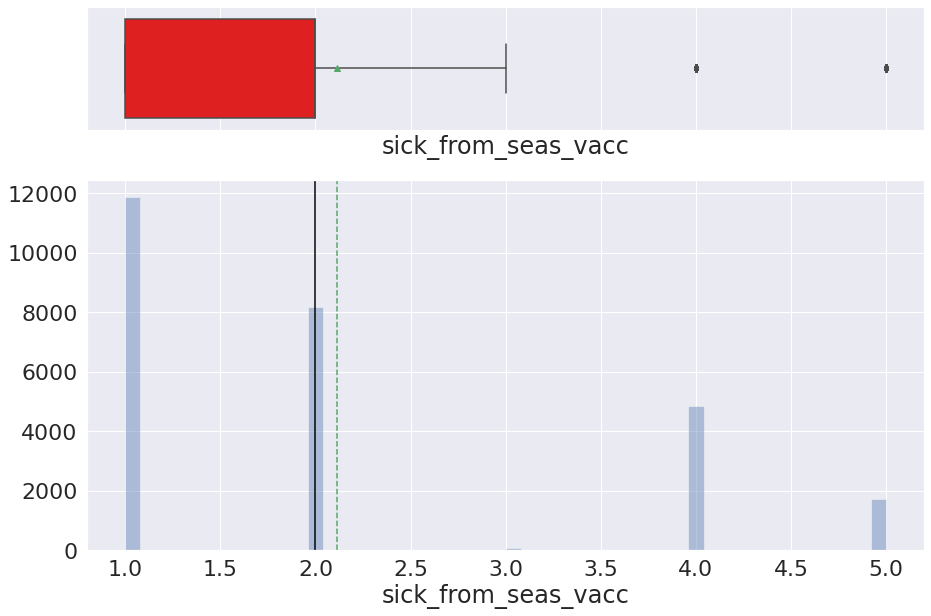

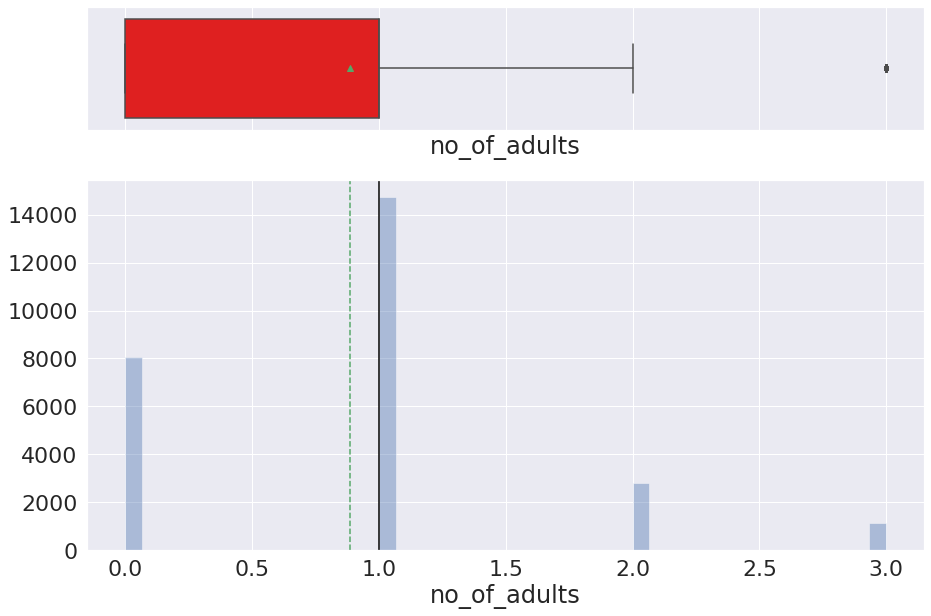

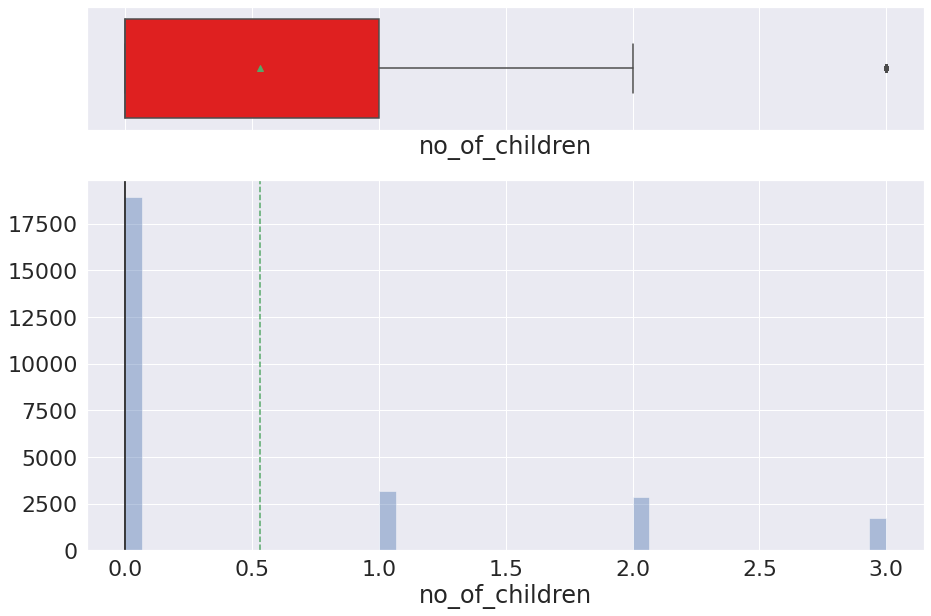

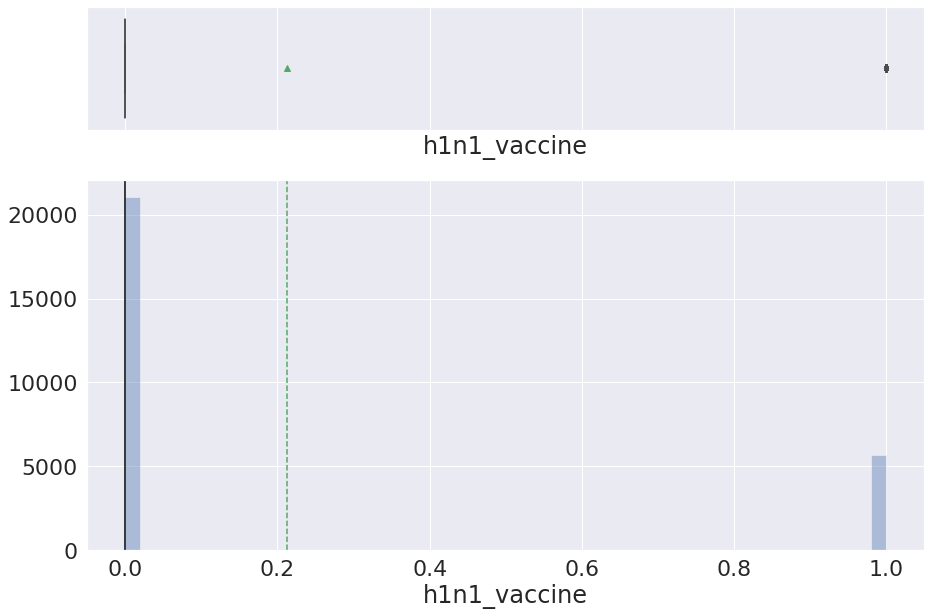

In [ ]:
for i in numeric_cols:
  histogram_boxplot(df[i])

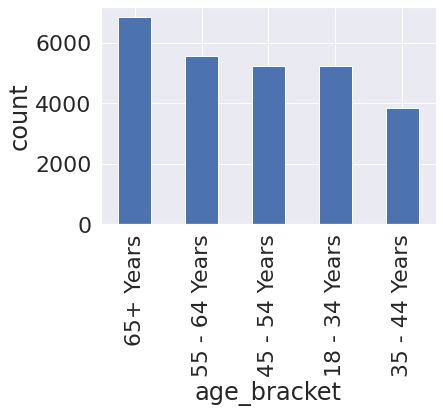

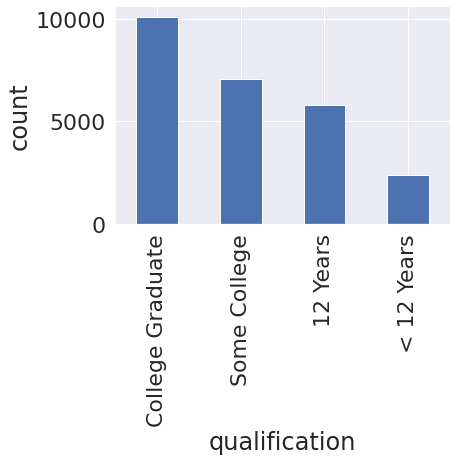

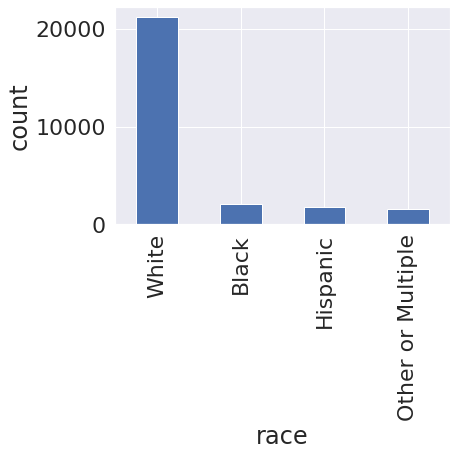

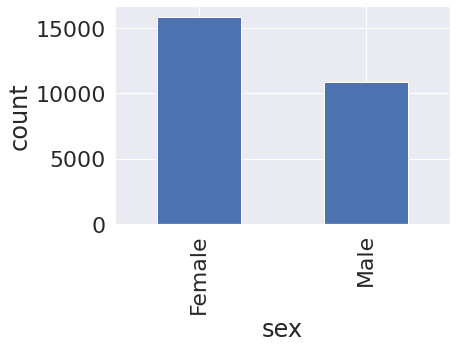

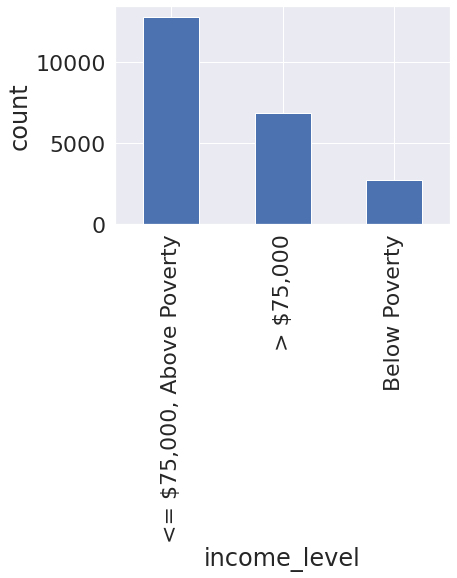

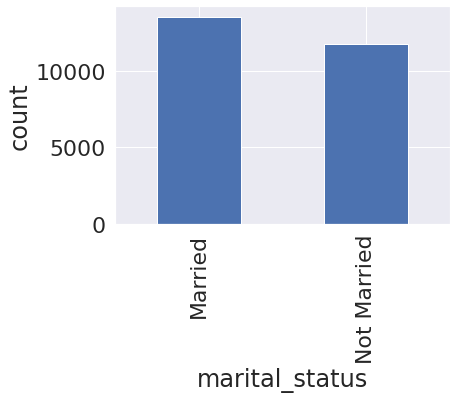

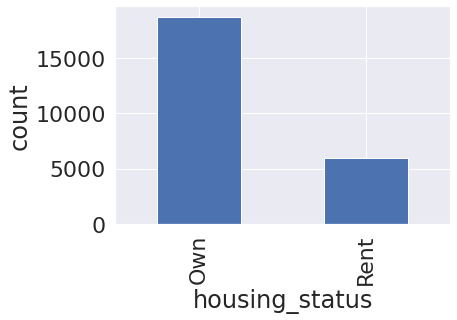

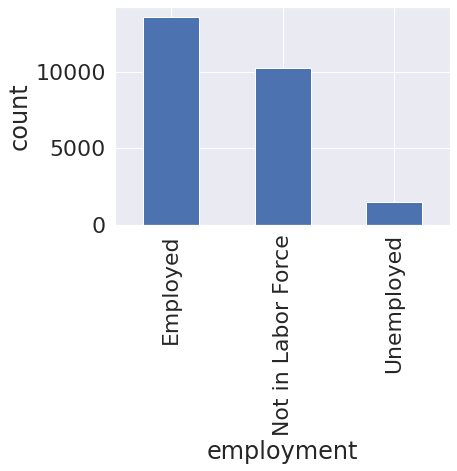

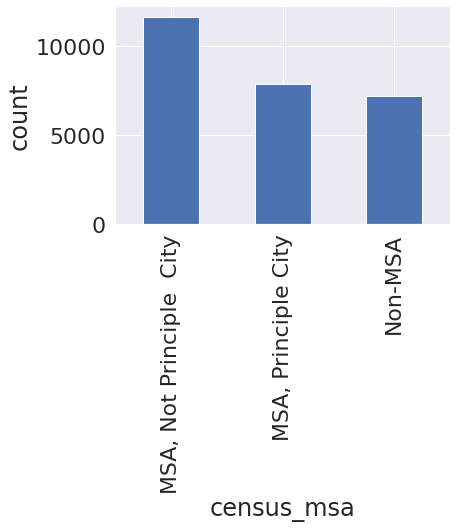

In [ ]:
#drawing all barplots for categorical columns

for features in object_cols:
  df[features].value_counts().plot.bar()
  plt.xlabel(features)
  plt.ylabel("count")
  plt.show()

In [ ]:
numeric_cols

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [ ]:
numeric_cols.remove('h1n1_vaccine')

In [ ]:
numeric_cols

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

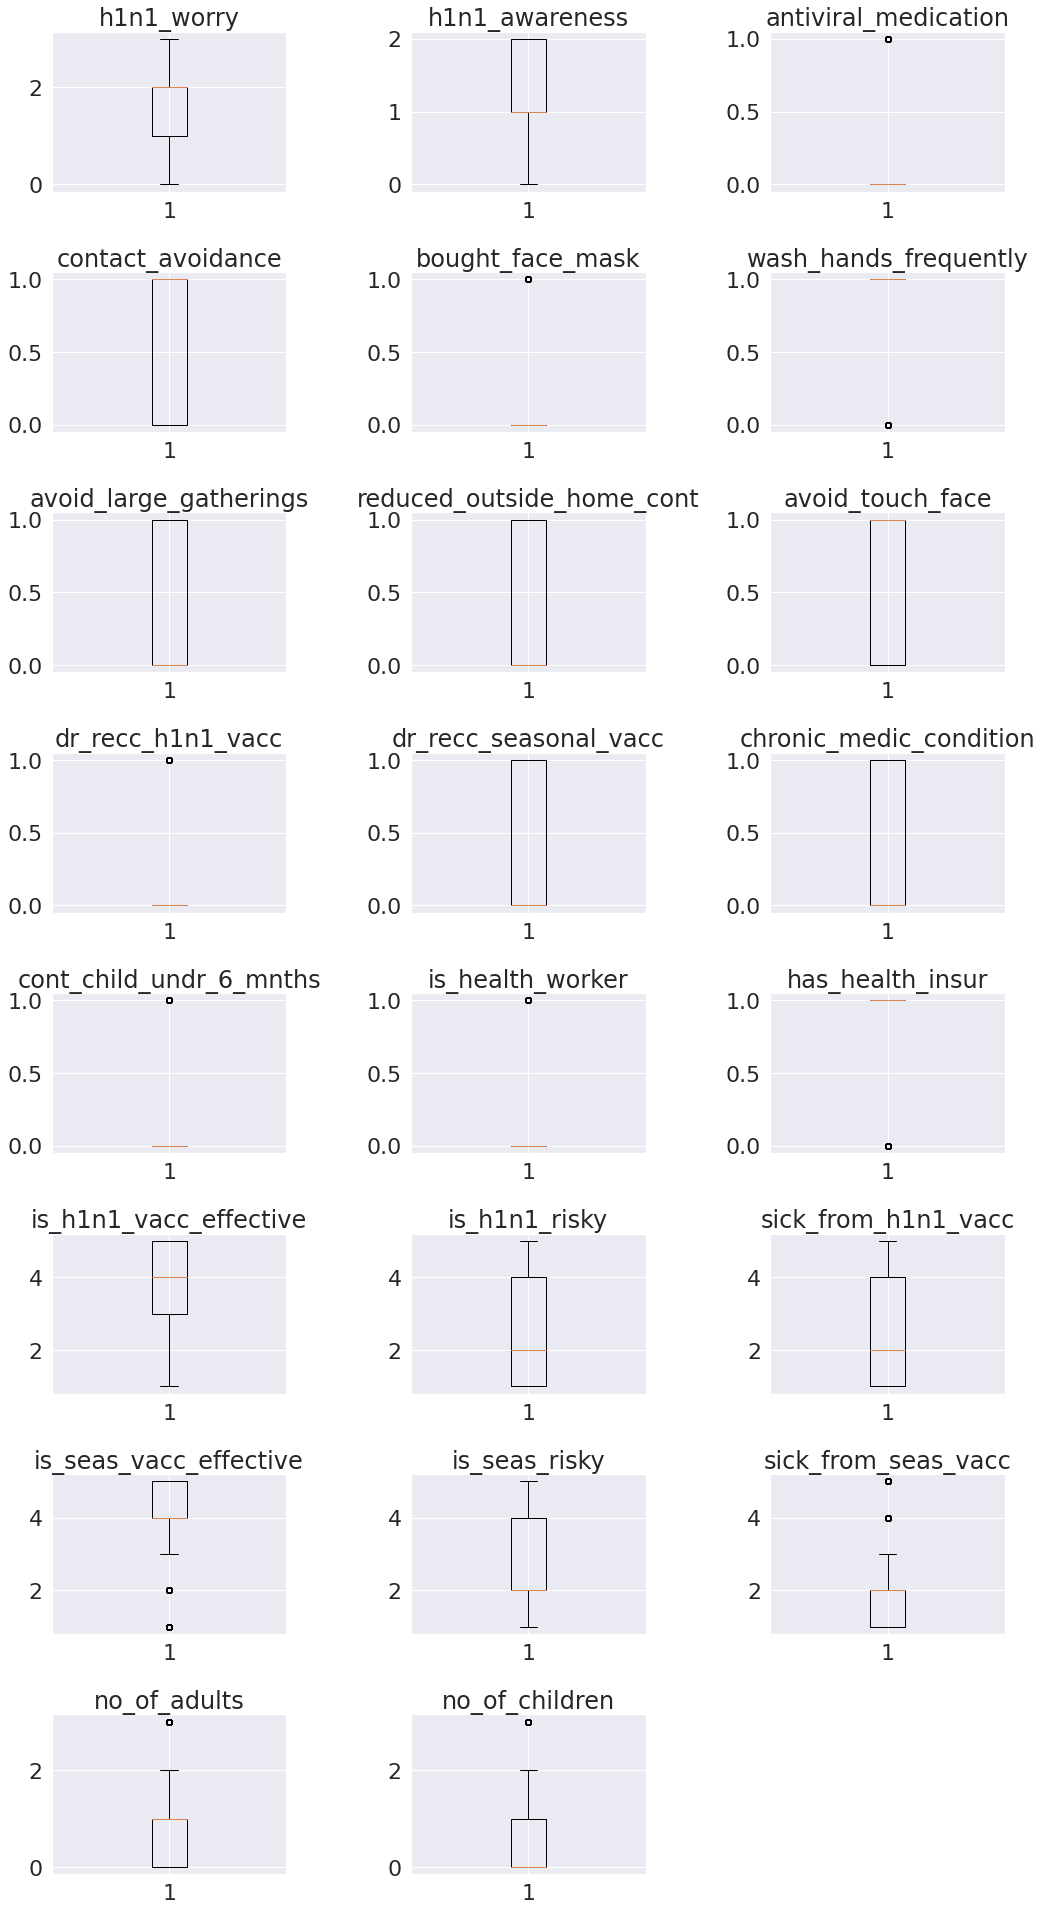

In [ ]:
#Outliers Detections 
#checking the outliers using boxplot 
#let us write a function that will help us boxplot for any input numerical variable
#It takes numerical columns as input and plots the boxplot of particular column with outliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

In [ ]:
#outliers treatment 
#clipping method is used for outliers treatment 
#In the given code below first it gets q1,q3 and IQR of every column and clipping process is done for outliers treatment
#for outliers treatment we can use np.clip and np.where for cliiping purpose 
for feature in numeric_cols :
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  Upper_whisker=Q3+1.5*IQR
  Lower_whisker=Q1-1.5*IQR
  df[feature] = np.where(df[feature] <Lower_whisker,Lower_whisker ,df[feature])
  df[feature] = np.where(df[feature] >Upper_whisker, Upper_whisker,df[feature])

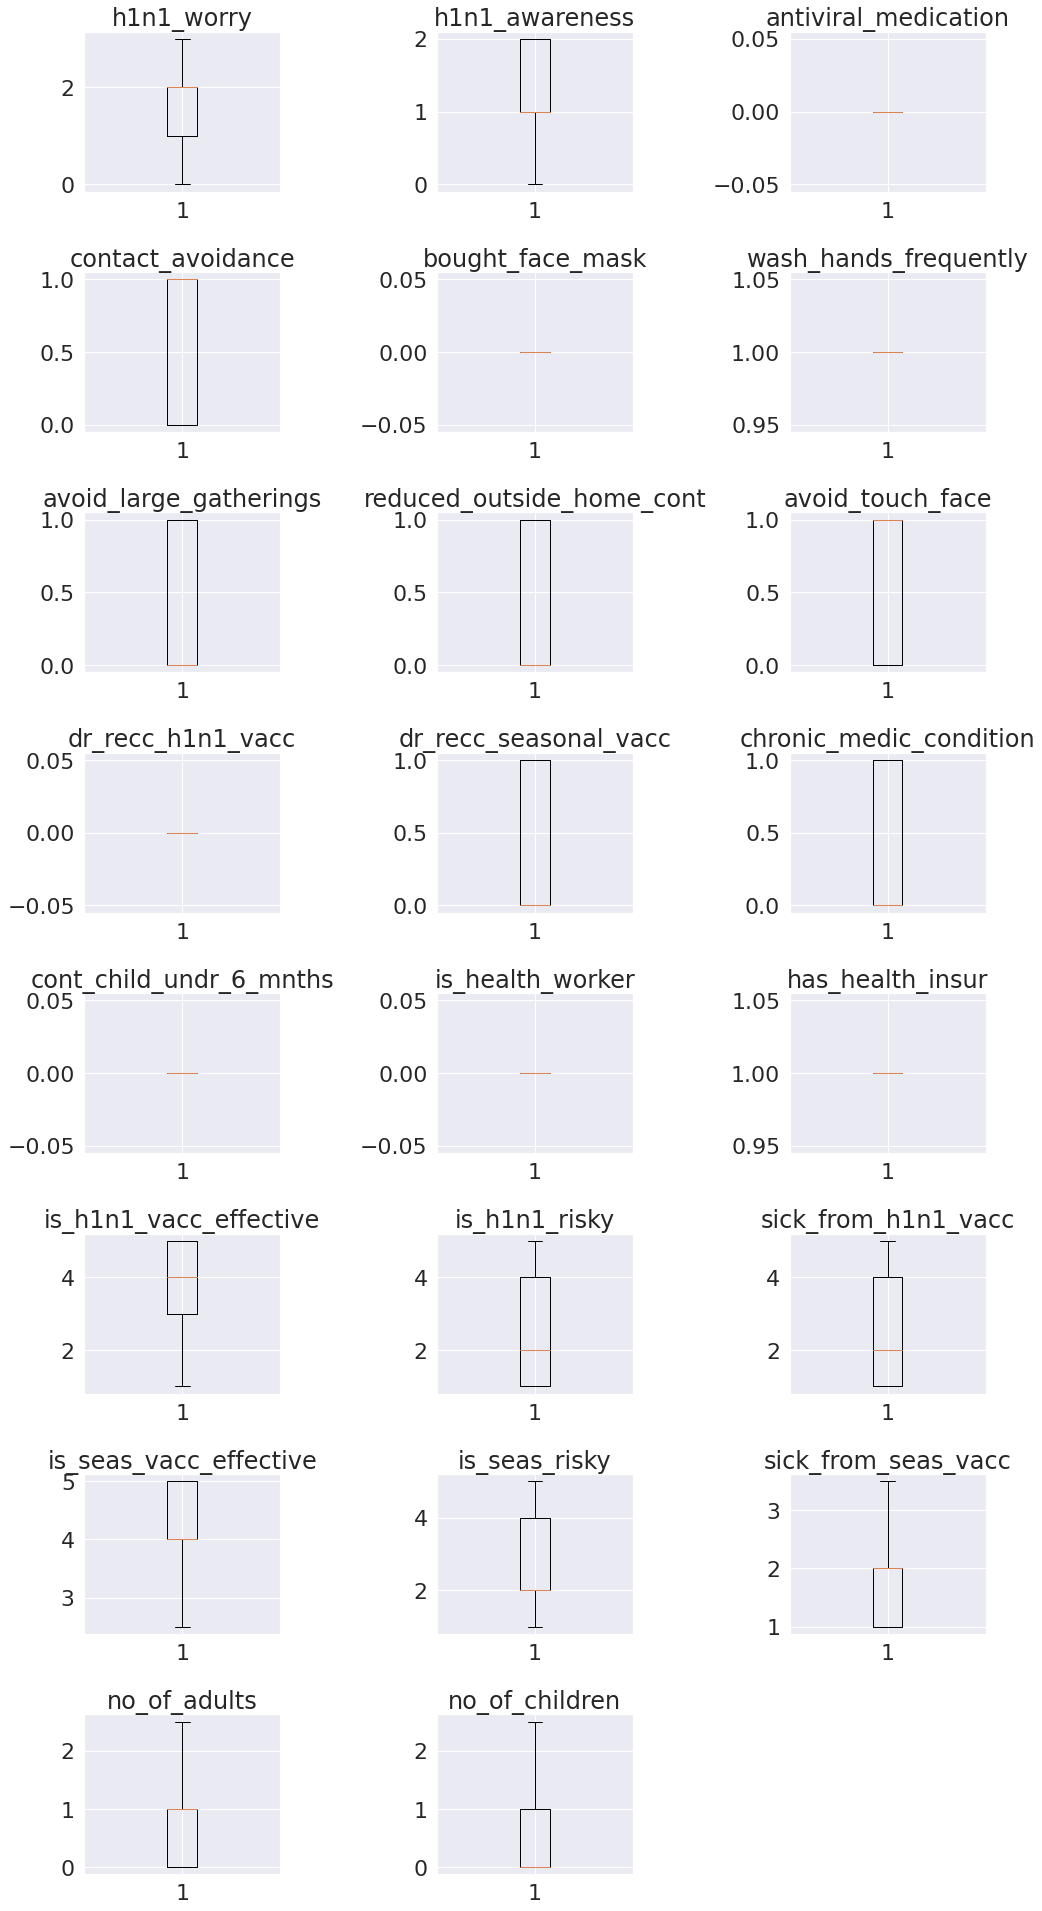

In [ ]:
#Outliers Detections 
#checking the outliers using boxplot 
#let us write a function that will help us boxplot for any input numerical variable
#It takes numerical columns as input and plots the boxplot of particular column with outliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

MODDELLING:

In [ ]:
#split the dependent and independent variable 
x = df.drop(['h1n1_vaccine'], axis=1)
y = df[['h1n1_vaccine']]

print(x.head())
print(y.head())

   h1n1_worry  h1n1_awareness  ...  no_of_adults  no_of_children
0         1.0             0.0  ...           0.0             0.0
1         3.0             2.0  ...           0.0             0.0
2         1.0             1.0  ...           2.0             0.0
3         1.0             1.0  ...           0.0             0.0
4         2.0             1.0  ...           1.0             0.0

[5 rows x 32 columns]
   h1n1_vaccine
0             0
1             0
2             0
3             0
4             0


In [ ]:
y.value_counts==1

False

In [ ]:
sobject_cols=df.select_dtypes(include=object).columns.to_list()
object_cols

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [ ]:

x = pd.get_dummies(x, columns=['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa'], drop_first=True)
x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.5,1.0,2.0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,3.5,0.0,0.0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,3.5,1.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#converting object datatype to category bcz category are faster than object datatype
categorical_columns=df.columns[df.dtypes == "object"]
for feature in categorical_columns:
  df[feature].astype("category")

In [ ]:

#import required libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 5)

In [ ]:
#checking the shape of splited data
x.shape

(26707, 42)

In [ ]:
#import confusion matrix code 
#cnfusion matrix creates crosstab of TN,TP,FP,FN
from sklearn.metrics import confusion_matrix

In [ ]:
# defining a confusion matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1,0]):
  '''
  y_predict : prediction of class
  y_actual : ground truth 
  '''
  cm =confusion_matrix(y_actual,y_predict,labels=[1,0])
  df_cm = pd.DataFrame(cm,index=[i for i in ["Provide Disc","No Disc"]],
                       columns=[i for i in ["Provide Disc","No Disc"]])
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1,v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm,annot=labels,fmt='')
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [ ]:
#choose the model and analyze
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
#fitting the model from x,y train set
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#predict the test set
pred_test = logreg.predict(x_test)

In [ ]:
#predict the train set
pred_train = logreg.predict(x_train)

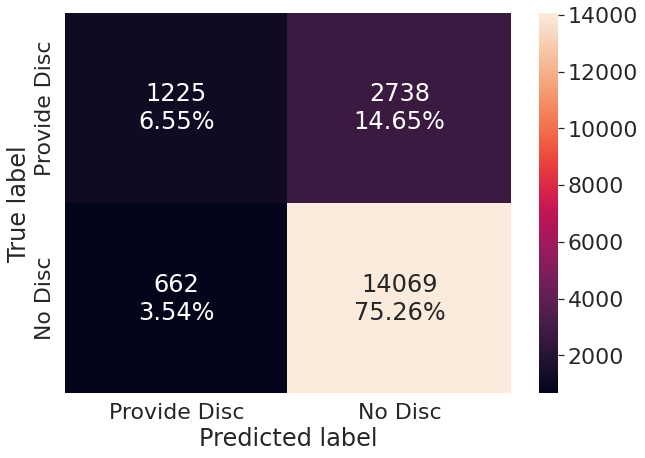

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train)

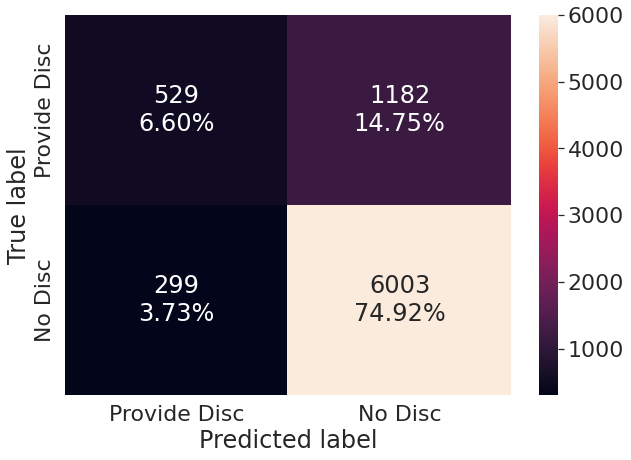

In [ ]:
#for test data call confusion matrix
make_confusion_matrix(y_test,pred_test)

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Accuracy on train data:",accuracy_score(y_train,pred_train))
print("Accuracy on test data:",accuracy_score(y_test,pred_test))
print("\n")
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")
print("f1 on train data:",f1_score(y_train,pred_train))
print("f1 on test data:",f1_score(y_test,pred_test))
print("\n")

Accuracy on train data: 0.8181234620733925
Accuracy on test data: 0.8151753400723823


Recall on train data: 0.3091092606611153
Recall on test data: 0.30917592051431914


Precision on train data: 0.649178590355061
Precision on test data: 0.6388888888888888


f1 on train data: 0.4188034188034188
f1 on test data: 0.4166994879873966




In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

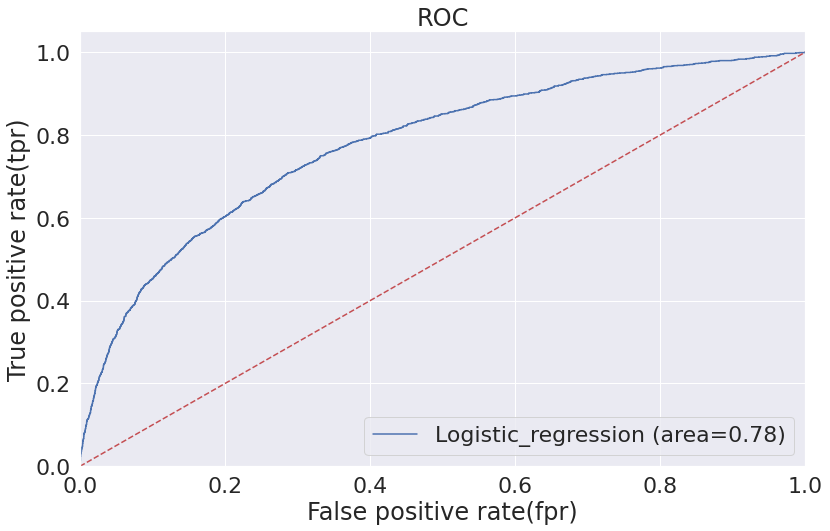

In [ ]:
#plotting the roc curve and getting the value of auc 
logit_roc_auc=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate(fpr)")
plt.ylabel("True positive rate(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [ ]:
#probaility of train set for predicted value
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.20715471, 0.48063669, 0.03877538, ..., 0.18217366, 0.02945172,
       0.09064125])

In [ ]:
#getting the value of cutoff,TN,TP,FN,FP,P,N
columns_names =["Cutoff_prob","TP","FN","TN","FP","P","N"]

cutoff_data= pd.DataFrame(columns=columns_names)
Cutoff_prob=np.arange(0,1.01,0.01)

for cutoff in Cutoff_prob:
  y_train["pred_y"]=(train_pred_prob > cutoff).astype("int64")
  TP =np.logical_and((y_train.pred_y ==1),(y_train.h1n1_vaccine ==1)).sum()
  FN =np.logical_and((y_train.pred_y ==0),(y_train.h1n1_vaccine ==1)).sum()
  TN =np.logical_and((y_train.pred_y ==0),(y_train.h1n1_vaccine ==0)).sum()
  FP =np.logical_and((y_train.pred_y ==1),(y_train.h1n1_vaccine ==0)).sum()
  P =TP + FN
  N =TN + FP
  temp_data={"Cutoff_Prob":cutoff,
             "TP":TP,
             "FN":FN,
             "TN":TN,
             "FP":FP,
             "P":P,
             "N":N}

  cutoff_data =cutoff_data.append(temp_data,ignore_index=True)   

  y_train.drop("pred_y",axis =1 ,inplace=True)

In [ ]:
#values of sn,sp,ks,dist cutoffs,re,pr,f1,tpr,fpr
cutoff_data['Sn'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] =cutoff_data["TN"]/cutoff_data["N"]
cutoff_data["Dist"]=((1-cutoff_data["Sn"])*2 + (1-cutoff_data["Sp"])*2) **0.5
cutoff_data["KS"]=((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] =cutoff_data["TP"]/(cutoff_data["TP"]+cutoff_data["FP"])
cutoff_data['tpr'] =cutoff_data["Re"]
cutoff_data['fpr'] =1 - cutoff_data["Sp"]
cutoff_data["f1"]=2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] +cutoff_data["Re"])

In [ ]:
dist_cutoffs = cutoff_data["Dist"].min()
ks_cutoffs = cutoff_data["KS"].max()
f1_cutoffs = cutoff_data["f1"].max()

In [ ]:
cutoff_data.head()

,Cutoff_prob,TP,FN,TN,FP,P,N,Cutoff_Prob,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,NaN,3963.0,0.0,0.0,14731.0,3963.0,14731.0,0.00,1.000000,0.000000,1.414214,0.000000,1.000000,0.211993,1.000000,1.000000,0.349826
1,NaN,3956.0,7.0,219.0,14512.0,3963.0,14731.0,0.01,0.998234,0.014867,1.404920,0.013100,0.998234,0.214208,0.998234,0.985133,0.352726
2,NaN,3941.0,22.0,820.0,13911.0,3963.0,14731.0,0.02,0.994449,0.055665,1.378322,0.050114,0.994449,0.220760,0.994449,0.944335,0.361311
3,NaN,3911.0,52.0,1460.0,13271.0,3963.0,14731.0,0.03,0.986879,0.099111,1.352043,0.085989,0.986879,0.227622,0.986879,0.900889,0.369922
4,NaN,3886.0,77.0,2117.0,12614.0,3963.0,14731.0,0.04,0.980570,0.143711,1.323419,0.124281,0.980570,0.235515,0.980570,0.856289,0.379807


In [ ]:
cutoffs = [dist_cutoffs,ks_cutoffs,f1_cutoffs]
for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test)[:,1]> cutoff).astype(int)
  print("using the cutoff value as : ",cutoff)
  print("Accuracy on train data :", accuracy_score(y_train,y_pred_train))
  print("Accuracy on test data :",accuracy_score(y_test,y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data :",f1_score(y_train,y_pred_train))
  print("f1 score on test data :",f1_score(y_test,y_pred_test))
  print("\n")

using the cutoff value as :  1.0563033382260691
Accuracy on train data : 0.788006847116722
Accuracy on test data : 0.7864719830275801
Recall on train data: 0.0
Recall on test data: 0.0
Precision on train data: 0.0
Precision on test data: 0.0
f1 score on train data : 0.0
f1 score on test data : 0.0


using the cutoff value as :  0.44211162882623123
Accuracy on train data : 0.8165721621910773
Accuracy on test data : 0.8124298015724448
Recall on train data: 0.3946505172848852
Recall on test data: 0.38457042665108127
Precision on train data: 0.6029298380878951
Precision on test data: 0.5938628158844765
f1 score on train data : 0.47704743022723806
f1 score on test data : 0.4668322100035474


using the cutoff value as :  0.5364253393665159
Accuracy on train data : 0.816465175992297
Accuracy on test data : 0.8130537875951579
Recall on train data: 0.25788544032298766
Recall on test data: 0.2536528345996493
Precision on train data: 0.6759259259259259
Precision on test data: 0.6625954198473283
f

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bagging=BaggingClassifier(random_state=10)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=10)

In [ ]:
pred_train=bagging.predict(x_train)

In [ ]:
pred_test=bagging.predict(x_test)

In [ ]:
#import confusion matrix code 
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,pred_train)

array([[14720,    11],
       [  320,  3643]])

In [ ]:
confusion_matrix(y_test,pred_test)

array([[5859,  443],
       [1216,  495]])

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 0.9192530910926066
Recall on test data: 0.28930450029222676




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train))
print("precision on test data:",precision_score(y_test,pred_test))
print("\n")

precision on train data: 0.9969896004378763
precision on test data: 0.5277185501066098




In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cl1=DecisionTreeClassifier(class_weight={0:0.33,1:0.67}, random_state=10)
param_grid={"base_estimator":[cl1],
            "n_estimators":[5,7,15,51,101],
            "max_features":[0.7,0.8,0.9,1]
            }
grid= GridSearchCV(BaggingClassifier(random_state=501,bootstrap=True),
                   param_grid=param_grid,scoring="recall",cv=5)
grid.fit(x_train
.300n,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=501),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.33,
                                                                                 1: 0.67},
                                                                   random_state=10)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
bagging_estimator=grid.best_estimator_
bagging_estimator.fit(x_train,y_train)

In [ ]:
from sklearn.datasets import load_svmlight_files

In [ ]:
df=load_svmlight_files

TypeError: ignored

In [ ]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
DESCR

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.DataFrame(df.data,columns=df.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
load_iris

<function sklearn.datasets._base.load_iris>

In [ ]:
from sklearn.datasets import  _base